# Análisis de Regresión Multivariable de Factores Socioeconómicos

Se realizará un estudio estadístico con propósito de investigación para determinar los factores socioeconómicos más significativos que puede afectar la tendencia de las tazas de suicidio a nivel global y nacional(República de Panamá).

El fin de este trabajo es encontrar una tendencia en los aspectos socioeconómicos y establecer una predición con Machine Learning de los posibles valores en cara a los próximos años para crear conciencia de la importancia de la salud mental de las personas.

### Valores Asignados por Región en el Modelo

Diccionario de mapeo de valores únicos a enteros:
{'EU': 1, 'AS': 2, 'OA': 3, 'NAC': 4, 'CSA': 5, 'AF': 6}

### Valores Asignados por País en el Modelo

Diccionario de mapeo de valores únicos a enteros para 'CountryCode':
{'ALB': 1, 'ARM': 2, 'AUS': 3, 'ARE': 4, 'AUT': 5, 'AZE': 6, 'BHS': 7, 'BEL': 8, 'BHR': 9, 'BGR': 10, 'BRB': 11, 'BLR': 12, 'BLZ': 13, 'BRA': 14, 'BRN': 15, 'CPV': 16, 'CAN': 17, 'CHL': 18, 'COL': 19, 'CHE': 20, 'CRI': 21, 'HRV': 22, 'CYP': 23, 'CZE': 24, 'DNK': 25, 'DOM': 26, 'DEU': 27, 'ECU': 28, 'EGY': 29, 'EST': 30, 'FJI': 31, 'FIN': 32, 'FRA': 33, 'GEO': 34, 'GRC': 35, 'ESP': 36, 'GTM': 37, 'GUY': 38, 'HKG': 39, 'HUN': 40, 'GBR': 41, 'ISL': 42, 'IRN': 43, 'IRQ': 44, 'IRL': 45, 'ISR': 46, 'ITA': 47, 'JAM': 48, 'JPN': 49, 'KAZ': 50, 'KOR': 51, 'KWT': 52, 'KGZ': 53, 'LVA': 54, 'LTU': 55, 'LUX': 56, 'MDV': 57, 'MLT': 58, 'MUS': 59, 'MEX': 60, 'MDA': 61, 'JOR': 62, 'MNE': 63, 'NLD': 64, 'NZL': 65, 'NIC': 66, 'MKD': 67, 'NOR': 68, 'LBN': 69, 'PAN': 70, 'PER': 71, 'LCA': 72, 'LKA': 73, 'MNG': 74, 'MYS': 75, 'OMN': 76, 'PHL': 77, 'POL': 78, 'PRT': 79, 'PRY': 80, 'QAT': 81, 'ROU': 82, 'RUS': 83, 'SGP': 84, 'SLV': 85, 'SRB': 86, 'SUR': 87, 'SVK': 88, 'SVN': 89, 'SWE': 90, 'THA': 91, 'TJK': 92, 'TTO': 93, 'TUR': 94, 'UKR': 95, 'URY': 96, 'USA': 97, 'UZB': 98, 'VCT': 99, 'VEN': 100, 'ZAF': 101}

## 1. Importaciones y Carga de Datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
## ROS
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek
## Warnings
import warnings
from sklearn.exceptions import DataConversionWarning

In [3]:
df = pd.read_csv("age_std_suicide_rates_1990-2022.csv")

## 2. Análisis de los Datos

In [4]:
df.head

<bound method NDFrame.head of      RegionCode RegionName CountryCode CountryName  Year     Sex  \
0            EU     Europe         ALB     Albania  1992    Male   
1            EU     Europe         ALB     Albania  1992  Female   
2            EU     Europe         ALB     Albania  1993    Male   
3            EU     Europe         ALB     Albania  1993  Female   
4            EU     Europe         ALB     Albania  1994    Male   
...         ...        ...         ...         ...   ...     ...   
5923         AF     Africa         MYT     Mayotte  2015  Female   
5924         AF     Africa         REU     R?union  2016    Male   
5925         AF     Africa         REU     R?union  2016  Female   
5926         AF     Africa         REU     R?union  2015    Male   
5927         AF     Africa         REU     R?union  2015  Female   

      SuicideCount  CauseSpecificDeathPercentage  StdDeathRate  \
0               33                      0.331959      2.335802   
1               14   

In [5]:
df.shape #Dimensiones del dataframe

(5928, 17)

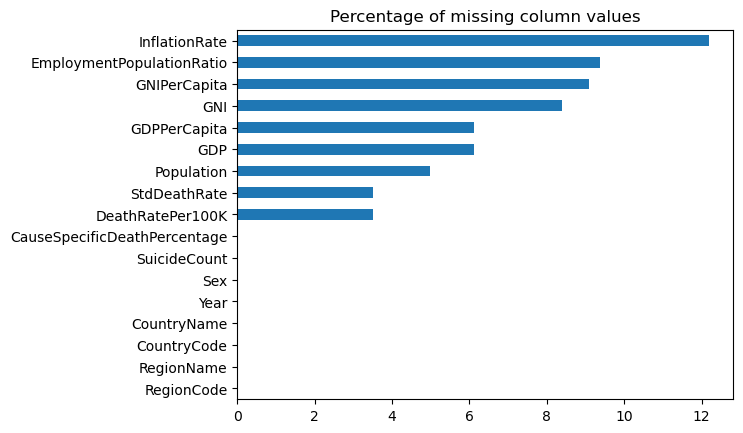

In [6]:
# Calculo de porcentaje de valores faltantes por columna
missing_percent_threshold = 20
missing_percentages = df.isna().sum() * 100 / len(df)
missing_percentages = round(missing_percentages, 2)

# Sort descendent
missing_percentages_sorted = missing_percentages.sort_values(ascending=True)


missing_percentages_sorted.plot(kind='barh', title="Percentage of missing column values")


for column, missing_percentage in missing_percentages_sorted.items():
    if missing_percentage > missing_percent_threshold:
        df.drop(columns=column, inplace=True)

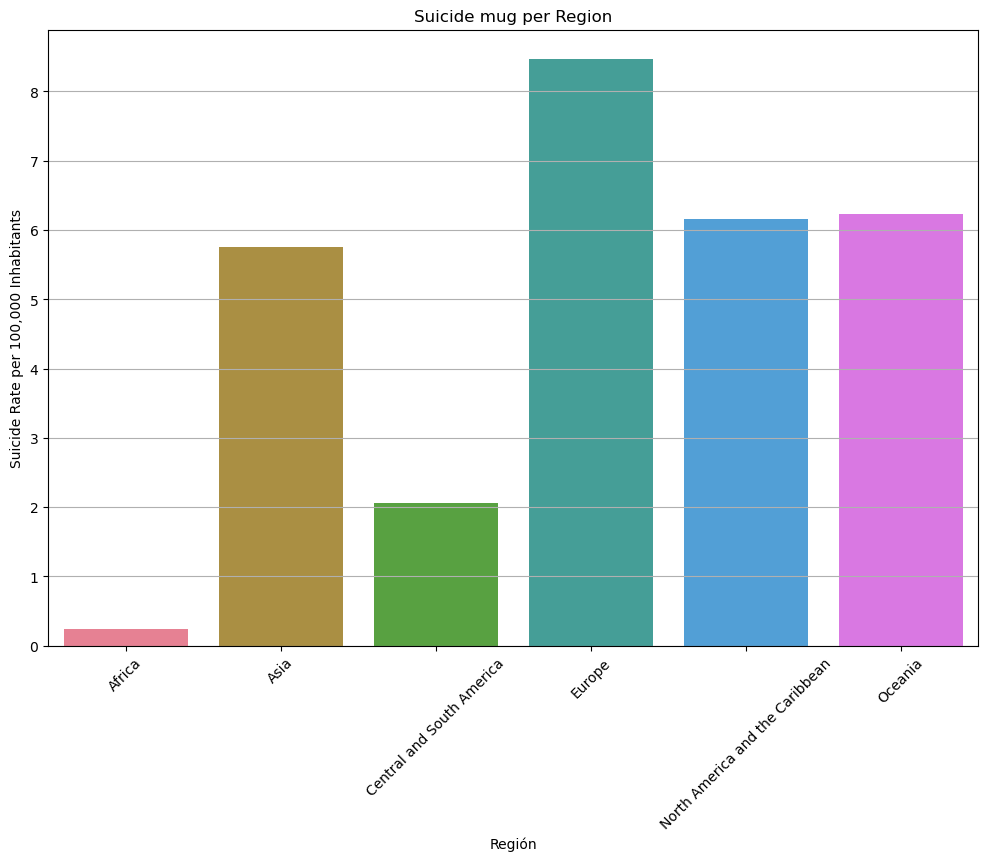

In [7]:
region_data = df.groupby('RegionName').agg({
    'SuicideCount': 'sum',
    'Population': 'sum'
}).reset_index()

# Suicide Rate per 100K per Region
region_data['SuicideRatePer100k'] = (region_data['SuicideCount'] / region_data['Population']) * 100000


palette = sns.color_palette("husl", len(region_data))

plt.figure(figsize=(12, 8))
sns.barplot(x='RegionName', y='SuicideRatePer100k', data=region_data, palette=palette)
plt.title('Suicide mug per Region')
plt.xlabel('Región')
plt.ylabel('Suicide Rate per 100,000 Inhabitants')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


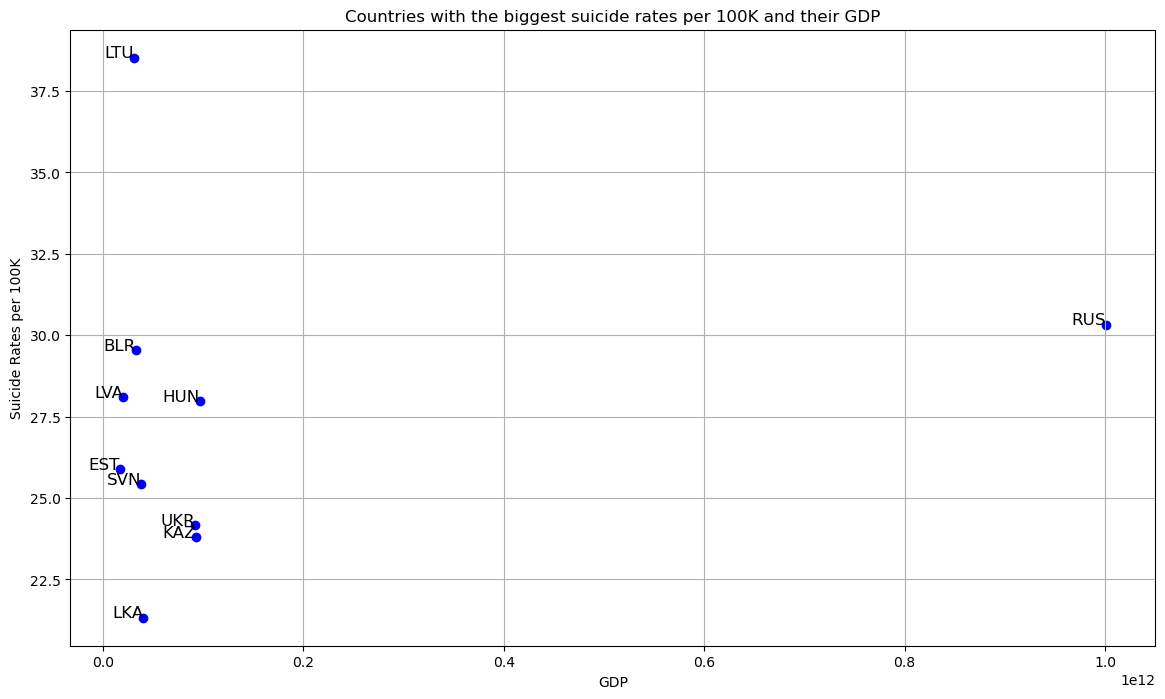

In [8]:

# Data until 2019
df_filtered = df[df['Year'] <= 2019]

country_stats = df_filtered.groupby('CountryCode').agg({
    'DeathRatePer100K': 'mean',
    'GDP': 'mean'
}).reset_index()

# top 10 countries with most death rate per 100K
top_countries = country_stats.sort_values(by='DeathRatePer100K', ascending=False).head(10)


plt.figure(figsize=(14, 8))
plt.scatter(top_countries['GDP'], top_countries['DeathRatePer100K'], color='blue')
for i, row in top_countries.iterrows():
    plt.text(row['GDP'], row['DeathRatePer100K'], row['CountryCode'], fontsize=12, ha='right')

plt.title('Countries with the biggest suicide rates per 100K and their GDP')
plt.xlabel('GDP')
plt.ylabel('Suicide Rates per 100K')
plt.grid(True)

plt.show()


C:\Users\cardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\cardo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


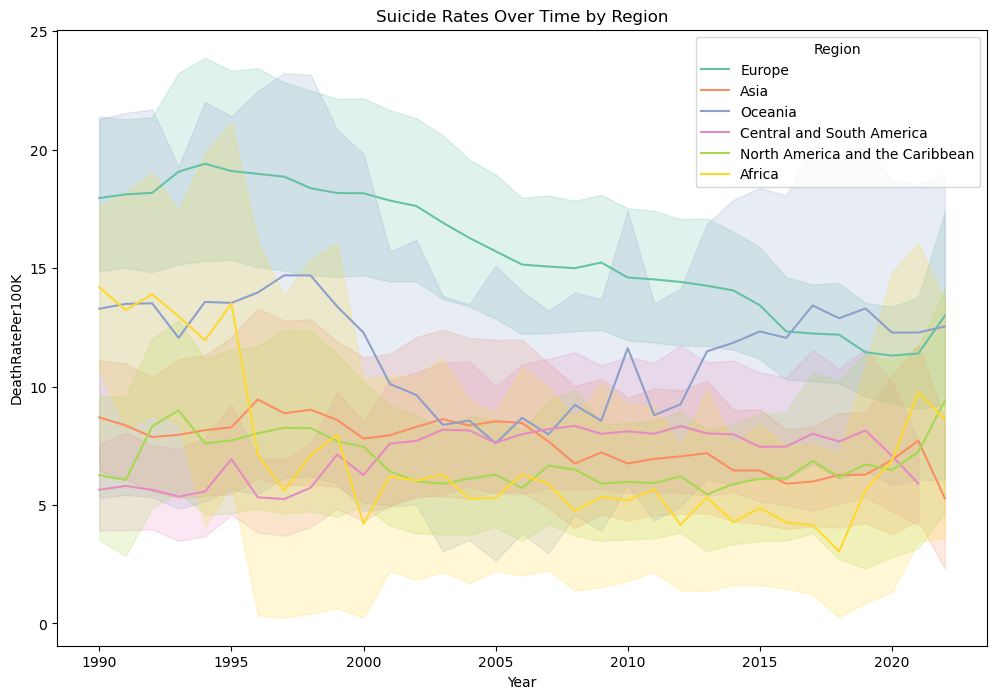

In [9]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='DeathRatePer100K', hue='RegionName', data=df, palette='Set2')
plt.title('Suicide Rates Over Time by Region')
plt.xlabel('Year')
plt.ylabel('DeathRatePer100K')
plt.legend(title='Region')
plt.show()

            GDP   GDP_rounded                          GDP_range
0  6.521750e+08  1.000000e+09  (-23300000000.0, 2330000000000.0]
1  6.521750e+08  1.000000e+09  (-23300000000.0, 2330000000000.0]
2  1.185315e+09  1.000000e+09  (-23300000000.0, 2330000000000.0]
3  1.185315e+09  1.000000e+09  (-23300000000.0, 2330000000000.0]
4  1.880951e+09  2.000000e+09  (-23300000000.0, 2330000000000.0]
                              GDP_range  SuicideCount
0     (-23300000000.0, 2330000000000.0]       4886895
1    (2330000000000.0, 4660000000000.0]        781278
2    (4660000000000.0, 6990000000000.0]        565864
3    (6990000000000.0, 9320000000000.0]        154439
4   (9320000000000.0, 11650000000000.0]        152310
5  (11650000000000.0, 13980000000000.0]         98376
6  (13980000000000.0, 16310000000000.0]        226036
7  (16310000000000.0, 18640000000000.0]        128115
8  (18640000000000.0, 20970000000000.0]        140482
9  (20970000000000.0, 23300000000000.0]        141673


C:\Users\cardo\AppData\Local\Temp\ipykernel_32528\877797124.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_suicide_counts = df_copy.groupby('GDP_range')['SuicideCount'].sum().reset_index()


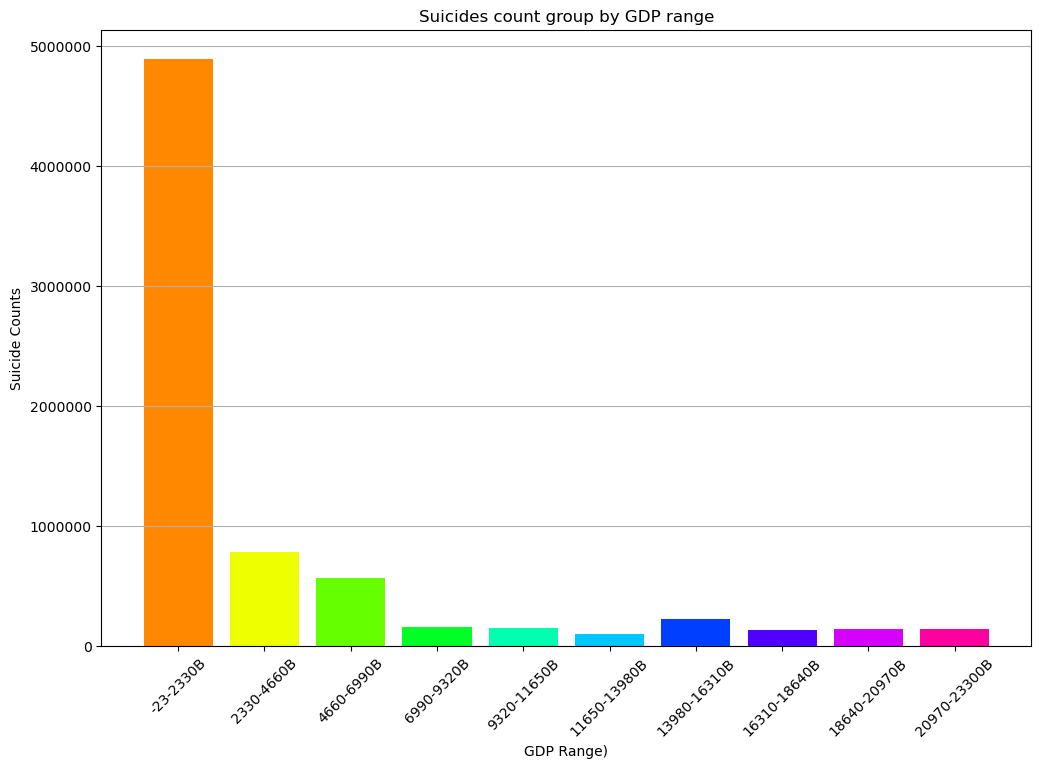

In [10]:
df_copy = df[['SuicideCount', 'GDP', 'Population']].dropna().copy()

df_copy['GDP_rounded'] = df_copy['GDP'].round(-9)  # Redondear a miles de millones
df_copy['GDP_range'] = pd.cut(df_copy['GDP_rounded'], bins=10)  # Ajusta los bins según sea necesario
print(df_copy[['GDP', 'GDP_rounded', 'GDP_range']].head())  # Verificar los intervalos creados

gdp_suicide_counts = df_copy.groupby('GDP_range')['SuicideCount'].sum().reset_index()
print(gdp_suicide_counts)  # Verificar los datos agrupados

palette = sns.color_palette("hsv", len(gdp_suicide_counts))  # Usando la paleta HSV


plt.figure(figsize=(12, 8))
bars = plt.bar(gdp_suicide_counts['GDP_range'].astype(str), gdp_suicide_counts['SuicideCount'], color=palette)
labels = [f'{int(interval.left/1e9)}-{int(interval.right/1e9)}B' for interval in gdp_suicide_counts['GDP_range']]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

plt.ticklabel_format(style='plain', axis='y')

plt.title('Suicides count group by GDP range')
plt.xlabel('GDP Range)')
plt.ylabel('Suicide Counts')
plt.grid(axis='y')
plt.show()


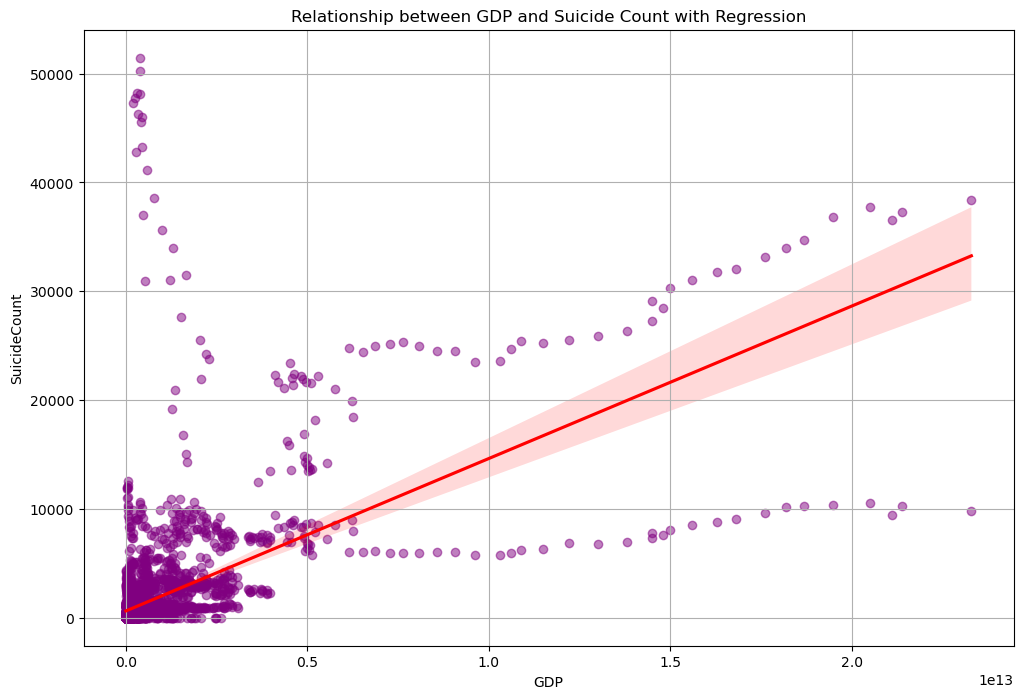

In [11]:

plt.figure(figsize=(12, 8))
sns.regplot(x='GDP', y='SuicideCount', data=df,color='purple', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship between GDP and Suicide Count with Regression')
plt.xlabel('GDP')
plt.ylabel('SuicideCount')
plt.grid(True)
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5928 entries, 0 to 5927
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    5928 non-null   object 
 1   RegionName                    5928 non-null   object 
 2   CountryCode                   5928 non-null   object 
 3   CountryName                   5928 non-null   object 
 4   Year                          5928 non-null   int64  
 5   Sex                           5928 non-null   object 
 6   SuicideCount                  5928 non-null   int64  
 7   CauseSpecificDeathPercentage  5927 non-null   float64
 8   StdDeathRate                  5720 non-null   float64
 9   DeathRatePer100K              5720 non-null   float64
 10  Population                    5632 non-null   float64
 11  GDP                           5566 non-null   float64
 12  GDPPerCapita                  5566 non-null   float64
 13  GNI

In [14]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,5928.0,2.005740e+03,8.745704e+00,1.990000e+03,1.999000e+03,2.006000e+03,2.013000e+03,2.022000e+03
SuicideCount,5928.0,1.267660e+03,3.887349e+03,0.000000e+00,3.000000e+01,2.265000e+02,8.360000e+02,5.146400e+04
CauseSpecificDeathPercentage,5927.0,1.264219e+00,1.188728e+00,0.000000e+00,4.310645e-01,8.825757e-01,1.870304e+00,1.666667e+01
StdDeathRate,5720.0,9.649577e+00,1.071504e+01,0.000000e+00,2.554089e+00,6.061477e+00,1.306487e+01,8.026149e+01
DeathRatePer100K,5720.0,1.068801e+01,1.176306e+01,0.000000e+00,2.741542e+00,6.813998e+00,1.435485e+01,8.352219e+01
Population,5632.0,2.456184e+07,4.531538e+07,4.054200e+04,2.613805e+06,6.888434e+06,2.533364e+07,3.320316e+08
GDP,5566.0,4.883873e+11,1.653792e+12,2.197630e+08,1.163490e+10,6.268216e+10,3.010000e+11,2.330000e+13
GDPPerCapita,5566.0,1.742351e+04,1.933379e+04,6.023512e+01,3.945244e+03,9.708141e+03,2.519727e+04,1.337118e+05
GNI,5430.0,4.975887e+11,1.688950e+12,2.082832e+08,1.176850e+10,5.987715e+10,3.055000e+11,2.370000e+13
GNIPerCapita,5390.0,2.214722e+04,1.888806e+04,7.800000e+02,8.670000e+03,1.615000e+04,2.953000e+04,1.526300e+05


In [15]:
df.describe(exclude=np.number).T

,count,unique,top,freq
RegionCode,5928,6,EU,2257
RegionName,5928,6,Europe,2257
CountryCode,5928,117,ARG,87
CountryName,5928,117,Argentina,87
Sex,5928,3,Male,2916


## 3. Limpieza de los Datos

In [16]:
df = df.dropna(subset = ['EmploymentPopulationRatio','InflationRate', 'GNIPerCapita', 'GNI', 'DeathRatePer100K', 'SuicideCount'])

In [17]:
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})

df.head()

C:\Users\cardo\AppData\Local\Temp\ipykernel_32528\1437647500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})


,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,EU,Europe,ALB,Albania,1992,1,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,EU,Europe,ALB,Albania,1992,0,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,EU,Europe,ALB,Albania,1993,1,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,EU,Europe,ALB,Albania,1993,0,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,EU,Europe,ALB,Albania,1994,1,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4698 entries, 0 to 5371
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    4698 non-null   object 
 1   RegionName                    4698 non-null   object 
 2   CountryCode                   4698 non-null   object 
 3   CountryName                   4698 non-null   object 
 4   Year                          4698 non-null   int64  
 5   Sex                           4698 non-null   int64  
 6   SuicideCount                  4698 non-null   int64  
 7   CauseSpecificDeathPercentage  4698 non-null   float64
 8   StdDeathRate                  4698 non-null   float64
 9   DeathRatePer100K              4698 non-null   float64
 10  Population                    4698 non-null   float64
 11  GDP                           4698 non-null   float64
 12  GDPPerCapita                  4698 non-null   float64
 13  GNI     

In [19]:
valores_unicos_region = df['RegionCode'].unique()
print("Valores únicos en 'RegionCode':")
print(valores_unicos_region)

Valores únicos en 'RegionCode':
['EU' 'AS' 'OA' 'NAC' 'CSA' 'AF']


In [20]:
# Construir el diccionario de mapeo
Region = {valor: indice+1 for indice, valor in enumerate(valores_unicos_region)}
print("Unique values map with Dictionary:")
print(Region)


Unique values map with Dictionary:
{'EU': 1, 'AS': 2, 'OA': 3, 'NAC': 4, 'CSA': 5, 'AF': 6}


In [21]:
Region

{'EU': 1, 'AS': 2, 'OA': 3, 'NAC': 4, 'CSA': 5, 'AF': 6}

In [22]:
df['RegionCode'].unique()

array(['EU', 'AS', 'OA', 'NAC', 'CSA', 'AF'], dtype=object)

In [23]:
# Mapear 'Female' y 'Male' directamente a 0 y 1 respectivamente
df['RegionCode'] = df['RegionCode'].map({'EU': 1, 'AS': 2, 'OA': 3, 'NAC': 4, 'CSA': 5, 'AF': 6})

# Verificar los cambios realizados
df.head()

C:\Users\cardo\AppData\Local\Temp\ipykernel_32528\294734711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RegionCode'] = df['RegionCode'].map({'EU': 1, 'AS': 2, 'OA': 3, 'NAC': 4, 'CSA': 5, 'AF': 6})


,RegionCode,RegionName,CountryCode,CountryName,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio
0,1,Europe,ALB,Albania,1992,1,33,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
1,1,Europe,ALB,Albania,1992,0,14,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315
2,1,Europe,ALB,Albania,1993,1,46,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
3,1,Europe,ALB,Albania,1993,0,27,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798
4,1,Europe,ALB,Albania,1994,1,37,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086


In [24]:
df['RegionCode'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4698 entries, 0 to 5371
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    4698 non-null   int64  
 1   RegionName                    4698 non-null   object 
 2   CountryCode                   4698 non-null   object 
 3   CountryName                   4698 non-null   object 
 4   Year                          4698 non-null   int64  
 5   Sex                           4698 non-null   int64  
 6   SuicideCount                  4698 non-null   int64  
 7   CauseSpecificDeathPercentage  4698 non-null   float64
 8   StdDeathRate                  4698 non-null   float64
 9   DeathRatePer100K              4698 non-null   float64
 10  Population                    4698 non-null   float64
 11  GDP                           4698 non-null   float64
 12  GDPPerCapita                  4698 non-null   float64
 13  GNI     

In [27]:
#Verify unique values to country code
valores_unicos_country = df['CountryCode'].unique()
print("Valores únicos en 'CountryCode':")
print(valores_unicos_country)

CountryCode_dict = {valor: indice + 1 for indice, valor in enumerate(valores_unicos_country)}
print("Diccionario de mapeo de valores únicos a enteros para 'CountryCode':")
print(CountryCode_dict)

# switch unique values with intergers for modeling
df['CountryCodeNumerico'] = df['CountryCode'].map(CountryCode_dict)


print("Valores únicos en 'CountryCodeNumerico':")
print(df['CountryCodeNumerico'].unique())

# Verify null values
nulos = df['CountryCodeNumerico'].isnull().sum()
print(f'Número de valores nulos en "CountryCodeNumerico": {nulos}')


print(df[['CountryCode', 'CountryCodeNumerico']].head())


Valores únicos en 'CountryCode':
['ALB' 'ARM' 'AUS' 'ARE' 'AUT' 'AZE' 'BHS' 'BEL' 'BHR' 'BGR' 'BRB' 'BLR'
 'BLZ' 'BRA' 'BRN' 'CPV' 'CAN' 'CHL' 'COL' 'CHE' 'CRI' 'HRV' 'CYP' 'CZE'
 'DNK' 'DOM' 'DEU' 'ECU' 'EGY' 'EST' 'FJI' 'FIN' 'FRA' 'GEO' 'GRC' 'ESP'
 'GTM' 'GUY' 'HKG' 'HUN' 'GBR' 'ISL' 'IRN' 'IRQ' 'IRL' 'ISR' 'ITA' 'JAM'
 'JPN' 'KAZ' 'KOR' 'KWT' 'KGZ' 'LVA' 'LTU' 'LUX' 'MDV' 'MLT' 'MUS' 'MEX'
 'MDA' 'JOR' 'MNE' 'NLD' 'NZL' 'NIC' 'MKD' 'NOR' 'LBN' 'PAN' 'PER' 'LCA'
 'LKA' 'MNG' 'MYS' 'OMN' 'PHL' 'POL' 'PRT' 'PRY' 'QAT' 'ROU' 'RUS' 'SGP'
 'SLV' 'SRB' 'SUR' 'SVK' 'SVN' 'SWE' 'THA' 'TJK' 'TTO' 'TUR' 'UKR' 'URY'
 'USA' 'UZB' 'VCT' 'VEN' 'ZAF']
Diccionario de mapeo de valores únicos a enteros para 'CountryCode':
{'ALB': 1, 'ARM': 2, 'AUS': 3, 'ARE': 4, 'AUT': 5, 'AZE': 6, 'BHS': 7, 'BEL': 8, 'BHR': 9, 'BGR': 10, 'BRB': 11, 'BLR': 12, 'BLZ': 13, 'BRA': 14, 'BRN': 15, 'CPV': 16, 'CAN': 17, 'CHL': 18, 'COL': 19, 'CHE': 20, 'CRI': 21, 'HRV': 22, 'CYP': 23, 'CZE': 24, 'DNK': 25, 'DOM': 26, 'DEU

C:\Users\cardo\AppData\Local\Temp\ipykernel_32528\2831477095.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CountryCodeNumerico'] = df['CountryCode'].map(CountryCode_dict)


In [28]:
df['CountryCode'].unique()

array(['ALB', 'ARM', 'AUS', 'ARE', 'AUT', 'AZE', 'BHS', 'BEL', 'BHR',
       'BGR', 'BRB', 'BLR', 'BLZ', 'BRA', 'BRN', 'CPV', 'CAN', 'CHL',
       'COL', 'CHE', 'CRI', 'HRV', 'CYP', 'CZE', 'DNK', 'DOM', 'DEU',
       'ECU', 'EGY', 'EST', 'FJI', 'FIN', 'FRA', 'GEO', 'GRC', 'ESP',
       'GTM', 'GUY', 'HKG', 'HUN', 'GBR', 'ISL', 'IRN', 'IRQ', 'IRL',
       'ISR', 'ITA', 'JAM', 'JPN', 'KAZ', 'KOR', 'KWT', 'KGZ', 'LVA',
       'LTU', 'LUX', 'MDV', 'MLT', 'MUS', 'MEX', 'MDA', 'JOR', 'MNE',
       'NLD', 'NZL', 'NIC', 'MKD', 'NOR', 'LBN', 'PAN', 'PER', 'LCA',
       'LKA', 'MNG', 'MYS', 'OMN', 'PHL', 'POL', 'PRT', 'PRY', 'QAT',
       'ROU', 'RUS', 'SGP', 'SLV', 'SRB', 'SUR', 'SVK', 'SVN', 'SWE',
       'THA', 'TJK', 'TTO', 'TUR', 'UKR', 'URY', 'USA', 'UZB', 'VCT',
       'VEN', 'ZAF'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4698 entries, 0 to 5371
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    4698 non-null   int64  
 1   RegionName                    4698 non-null   object 
 2   CountryCode                   4698 non-null   object 
 3   CountryName                   4698 non-null   object 
 4   Year                          4698 non-null   int64  
 5   Sex                           4698 non-null   int64  
 6   SuicideCount                  4698 non-null   int64  
 7   CauseSpecificDeathPercentage  4698 non-null   float64
 8   StdDeathRate                  4698 non-null   float64
 9   DeathRatePer100K              4698 non-null   float64
 10  Population                    4698 non-null   float64
 11  GDP                           4698 non-null   float64
 12  GDPPerCapita                  4698 non-null   float64
 13  GNI     

In [30]:
df['CountryCodeNumerico'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101], dtype=int64)

In [31]:
# Drop unnecesary columns after create new Region Code and Country Code columns 
columnas_a_eliminar = ['RegionName', 'CountryName', 'CountryCode']
df = df.drop(columns=columnas_a_eliminar)

print("Columnas después de eliminar las columnas no deseadas:")
print(df.columns)




Columnas después de eliminar las columnas no deseadas:
Index(['RegionCode', 'Year', 'Sex', 'SuicideCount',
       'CauseSpecificDeathPercentage', 'StdDeathRate', 'DeathRatePer100K',
       'Population', 'GDP', 'GDPPerCapita', 'GNI', 'GNIPerCapita',
       'InflationRate', 'EmploymentPopulationRatio', 'CountryCodeNumerico'],
      dtype='object')


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4698 entries, 0 to 5371
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RegionCode                    4698 non-null   int64  
 1   Year                          4698 non-null   int64  
 2   Sex                           4698 non-null   int64  
 3   SuicideCount                  4698 non-null   int64  
 4   CauseSpecificDeathPercentage  4698 non-null   float64
 5   StdDeathRate                  4698 non-null   float64
 6   DeathRatePer100K              4698 non-null   float64
 7   Population                    4698 non-null   float64
 8   GDP                           4698 non-null   float64
 9   GDPPerCapita                  4698 non-null   float64
 10  GNI                           4698 non-null   float64
 11  GNIPerCapita                  4698 non-null   float64
 12  InflationRate                 4698 non-null   float64
 13  Employme

df.info() is now clean without nulls, duplicated values and unnecesary columns in the analysis and predictions.


      Female    Male
Year                
1991   33933   91850
1992   35873  101560
1993   48813  162275
1994   49735  175237
1995   52036  181051
1996   52378  184563
1997   53001  183107
1998   54535  190323
1999   55043  196008
2000   54261  196972
2001   52110  194085
2002   54559  197349
2003   54748  197376
2004   53504  188212
2005   52348  183002
2006   51862  179401
2007   54065  181433
2008   53719  179629
2009   55273  189388
2010   54471  184811
2011   55169  183373
2012   53575  177776
2013   52797  174190
2014   54173  178725
2015   53366  173178
2016   49592  163951
2017   50505  169436
2018   50162  169606
2019   49395  168958


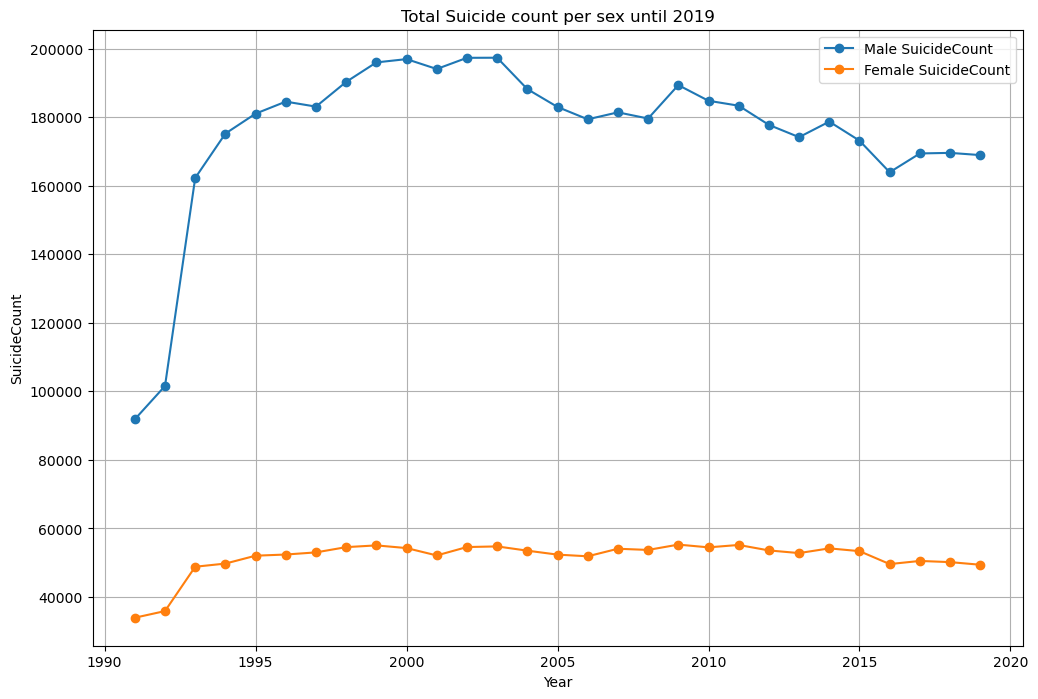

In [34]:
df_filtered = df[df['Year'] <= 2019]# 2020 data is almost empty

suicide_count_by_year_sex = df_filtered.groupby(['Year', 'Sex'])['SuicideCount'].sum().reset_index()

suicide_count_pivot = suicide_count_by_year_sex.pivot(index='Year', columns='Sex', values='SuicideCount')
suicide_count_pivot.columns = ['Female', 'Male']

print(suicide_count_pivot)

plt.figure(figsize=(12, 8))
plt.plot(suicide_count_pivot.index, suicide_count_pivot['Male'], label='Male SuicideCount', marker='o')
plt.plot(suicide_count_pivot.index, suicide_count_pivot['Female'], label='Female SuicideCount', marker='o')
plt.title('Total Suicide count per sex until 2019')
plt.xlabel('Year')
plt.ylabel('SuicideCount')
plt.legend()
plt.grid(True)
plt.show()


## 3. Data Balance


In [35]:
# independent variables
X_df = df[['RegionCode', 'Year', 'Sex', 'CauseSpecificDeathPercentage', 'StdDeathRate', 'DeathRatePer100K', 
           'Population', 'GDP', 'GDPPerCapita', 'GNI', 'GNIPerCapita', 'InflationRate', 'EmploymentPopulationRatio','CountryCodeNumerico']]

X = np.array(X_df)
X_df

,RegionCode,Year,Sex,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio,CountryCodeNumerico
0,1,1992,1,0.331959,2.335802,2.076386,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315,1
1,1,1992,0,0.191860,0.866420,0.874563,3247039.0,6.521750e+08,200.852220,9.061842e+08,1740.0,226.005421,45.315,1
2,1,1993,1,0.477724,3.330938,2.937233,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798,1
3,1,1993,0,0.385164,1.755077,1.686025,3227287.0,1.185315e+09,367.279225,1.024263e+09,2110.0,85.004751,47.798,1
4,1,1994,1,0.419406,2.678796,2.332619,3207536.0,1.880951e+09,586.416135,1.216681e+09,2300.0,22.565053,50.086,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5366,6,2016,0,0.035226,0.278158,0.273954,56422274.0,3.240000e+11,5735.066787,3.360000e+11,13350.0,6.571396,44.046,101
5368,6,2017,1,0.115853,1.020338,0.999238,56641209.0,3.810000e+11,6734.475153,3.370000e+11,13560.0,5.184247,44.679,101
5369,6,2017,0,0.043992,0.326797,0.328853,56641209.0,3.810000e+11,6734.475153,3.370000e+11,13560.0,5.184247,44.679,101
5370,6,2018,1,0.097257,0.813995,0.814175,57339635.0,4.050000e+11,7067.724165,3.670000e+11,13930.0,4.517165,44.051,101


In [36]:
Y_df = df[['SuicideCount']]#target of this investigation

Y = np.array(Y_df)
Y_df

,SuicideCount
0,33
1,14
2,46
3,27
4,37
...,...
5366,78
5368,281
5369,95
5370,232


## 4. Correlation

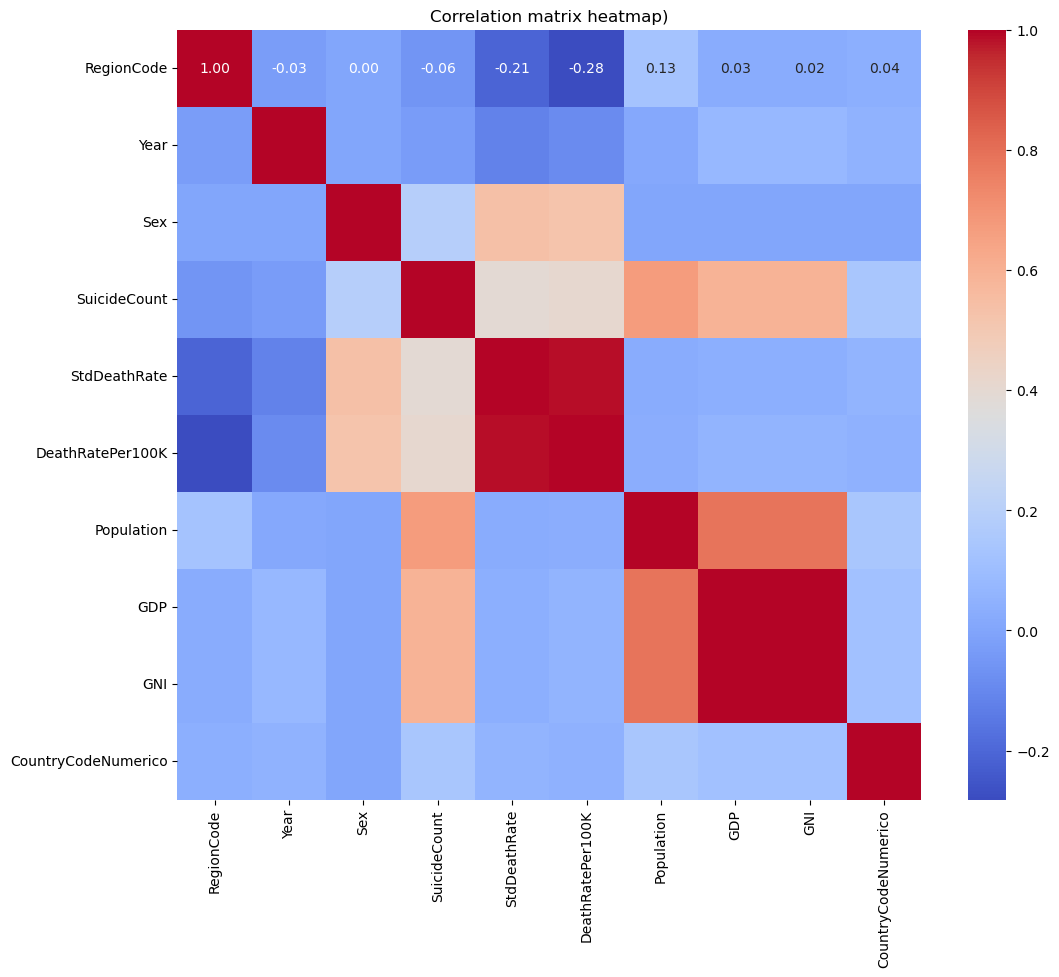

In [38]:

df_filtered = df.drop(columns=['CauseSpecificDeathPercentage', 'GDPPerCapita', 'GNIPerCapita', 'EmploymentPopulationRatio', 'InflationRate'])

corr_matrix_filtered = df_filtered.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_filtered, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation matrix heatmap)')
plt.show()


In [39]:
corre = df.corr()#correlation data 
corre


,RegionCode,Year,Sex,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio,CountryCodeNumerico
RegionCode,1.000000e+00,-2.711612e-02,1.891036e-16,-0.060899,-0.114442,-0.209197,-0.281377,1.274131e-01,2.527460e-02,-3.586047e-01,2.421199e-02,-3.351481e-01,-1.267331e-02,1.021518e-01,3.791249e-02
Year,-2.711612e-02,1.000000e+00,4.055566e-17,-0.033719,-0.081497,-0.120643,-0.091060,9.520749e-03,7.775337e-02,2.771950e-01,7.807358e-02,3.721160e-01,-1.345309e-01,8.086270e-02,5.090093e-02
Sex,1.891036e-16,4.055566e-17,1.000000e+00,0.189901,0.555261,0.535861,0.520199,4.574586e-16,4.023977e-16,-1.774738e-16,4.015210e-16,-1.032530e-16,-4.112227e-17,-1.031958e-16,2.148704e-15
SuicideCount,-6.089892e-02,-3.371880e-02,1.899010e-01,1.000000,0.311699,0.392035,0.407745,6.737153e-01,5.914123e-01,8.323154e-02,5.907276e-01,5.035802e-02,4.255768e-02,1.861589e-02,1.400883e-01
CauseSpecificDeathPercentage,-1.144422e-01,-8.149711e-02,5.552606e-01,0.311699,1.000000,0.881010,0.864098,-3.085023e-03,5.668735e-02,1.207007e-01,5.734524e-02,8.091930e-02,3.249562e-03,2.395962e-02,4.163220e-02
StdDeathRate,-2.091972e-01,-1.206429e-01,5.358612e-01,0.392035,0.881010,1.000000,0.987991,2.407747e-02,3.844682e-02,9.429303e-05,3.873861e-02,-6.398071e-02,4.966748e-02,-1.038845e-01,5.700549e-02
DeathRatePer100K,-2.813771e-01,-9.106013e-02,5.201993e-01,0.407745,0.864098,0.987991,1.000000,3.235756e-02,5.511302e-02,4.408150e-02,5.565377e-02,-1.934492e-02,4.188645e-02,-1.236624e-01,4.399122e-02
Population,1.274131e-01,9.520749e-03,4.574586e-16,0.673715,-0.003085,0.024077,0.032358,1.000000e+00,7.893882e-01,5.868548e-02,7.869273e-01,2.612579e-02,4.276698e-02,1.525433e-02,1.421651e-01
GDP,2.527460e-02,7.775337e-02,4.023977e-16,0.591412,0.056687,0.038447,0.055113,7.893882e-01,1.000000e+00,2.848260e-01,9.993030e-01,2.347607e-01,-2.417530e-02,4.799006e-02,1.141966e-01
GDPPerCapita,-3.586047e-01,2.771950e-01,-1.774738e-16,0.083232,0.120701,0.000094,0.044082,5.868548e-02,2.848260e-01,1.000000e+00,2.832889e-01,8.555144e-01,-8.323924e-02,2.982081e-01,-9.469405e-02


In [40]:
# Correlation analysis
print("\nCorrelation matrix:")
df.drop(columns=['RegionCode', 'Sex']).corr()


Correlation matrix:


,Year,SuicideCount,CauseSpecificDeathPercentage,StdDeathRate,DeathRatePer100K,Population,GDP,GDPPerCapita,GNI,GNIPerCapita,InflationRate,EmploymentPopulationRatio,CountryCodeNumerico
Year,1.000000,-0.033719,-0.081497,-0.120643,-0.091060,0.009521,0.077753,0.277195,0.078074,0.372116,-0.134531,0.080863,0.050901
SuicideCount,-0.033719,1.000000,0.311699,0.392035,0.407745,0.673715,0.591412,0.083232,0.590728,0.050358,0.042558,0.018616,0.140088
CauseSpecificDeathPercentage,-0.081497,0.311699,1.000000,0.881010,0.864098,-0.003085,0.056687,0.120701,0.057345,0.080919,0.003250,0.023960,0.041632
StdDeathRate,-0.120643,0.392035,0.881010,1.000000,0.987991,0.024077,0.038447,0.000094,0.038739,-0.063981,0.049667,-0.103885,0.057005
DeathRatePer100K,-0.091060,0.407745,0.864098,0.987991,1.000000,0.032358,0.055113,0.044082,0.055654,-0.019345,0.041886,-0.123662,0.043991
Population,0.009521,0.673715,-0.003085,0.024077,0.032358,1.000000,0.789388,0.058685,0.786927,0.026126,0.042767,0.015254,0.142165
GDP,0.077753,0.591412,0.056687,0.038447,0.055113,0.789388,1.000000,0.284826,0.999303,0.234761,-0.024175,0.047990,0.114197
GDPPerCapita,0.277195,0.083232,0.120701,0.000094,0.044082,0.058685,0.284826,1.000000,0.283289,0.855514,-0.083239,0.298208,-0.094694
GNI,0.078074,0.590728,0.057345,0.038739,0.055654,0.786927,0.999303,0.283289,1.000000,0.234381,-0.024155,0.046424,0.114055
GNIPerCapita,0.372116,0.050358,0.080919,-0.063981,-0.019345,0.026126,0.234761,0.855514,0.234381,1.000000,-0.090466,0.376144,-0.057365


## 5. Train and test 

In [41]:
#test size 25%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


## 6. Machine Learning Linear Regression Model per Sex

    Year  Predicted_SuicideCount_Male  Predicted_SuicideCount_Female
0   2020                185995.435961                   54884.189655
1   2021                186678.292611                   55106.351724
2   2022                187361.149261                   55328.513793
3   2023                188044.005911                   55550.675862
4   2024                188726.862562                   55772.837931
5   2025                189409.719212                   55995.000000
6   2026                190092.575862                   56217.162069
7   2027                190775.432512                   56439.324138
8   2028                191458.289163                   56661.486207
9   2029                192141.145813                   56883.648276
10  2030                192824.002463                   57105.810345


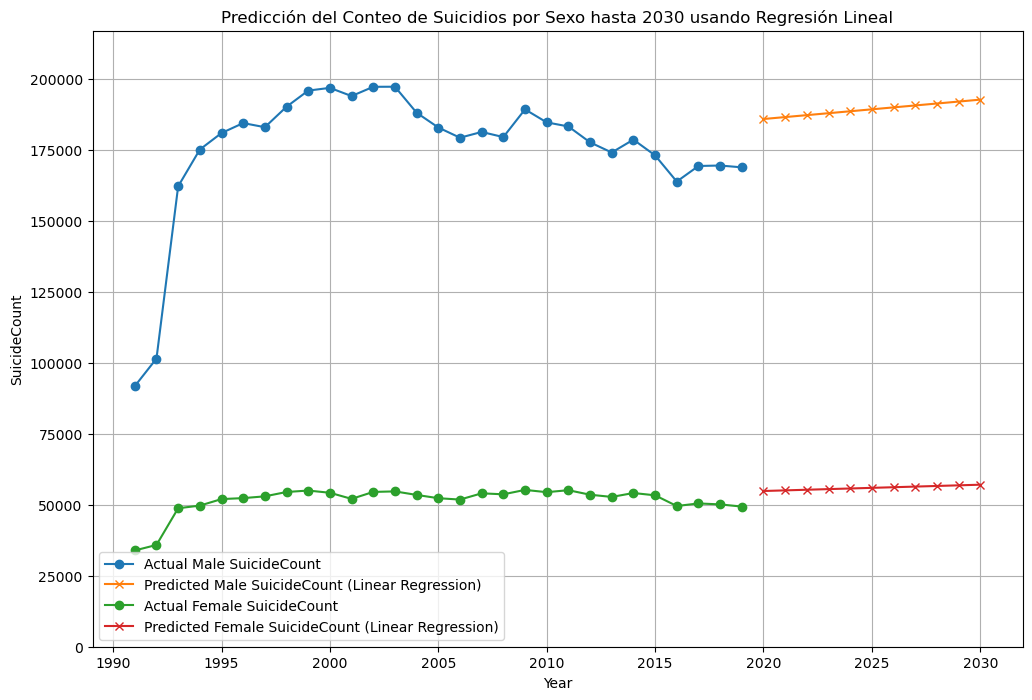

In [42]:

from sklearn.linear_model import LinearRegression



df_filtered = df[df['Year'] <= 2019]


suicide_count_by_year_sex = df_filtered.groupby(['Year', 'Sex'])['SuicideCount'].sum().reset_index()
suicide_count_pivot = suicide_count_by_year_sex.pivot(index='Year', columns='Sex', values='SuicideCount')
suicide_count_pivot.columns = ['Female', 'Male']

predictions = {}
for sex in ['Male', 'Female']:
    X = suicide_count_pivot.index.values.reshape(-1, 1)
    y = suicide_count_pivot[sex].values
    model = LinearRegression()
    model.fit(X, y)
    
    future_years = np.arange(2020, 2031).reshape(-1, 1)
    predictions[sex] = model.predict(future_years)

predictions_df = pd.DataFrame({
    'Year': np.arange(2020, 2031),
    'Predicted_SuicideCount_Male': predictions['Male'],
    'Predicted_SuicideCount_Female': predictions['Female']
})


print(predictions_df)


plt.figure(figsize=(12, 8))
plt.plot(suicide_count_pivot.index, suicide_count_pivot['Male'], label='Actual Male SuicideCount', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Predicted_SuicideCount_Male'], label='Predicted Male SuicideCount (Linear Regression)', marker='x')
plt.plot(suicide_count_pivot.index, suicide_count_pivot['Female'], label='Actual Female SuicideCount', marker='o')
plt.plot(predictions_df['Year'], predictions_df['Predicted_SuicideCount_Female'], label='Predicted Female SuicideCount (Linear Regression)', marker='x')
plt.title('Predicción del Conteo de Suicidios por Sexo hasta 2030 usando Regresión Lineal')
plt.xlabel('Year')
plt.ylabel('SuicideCount')
plt.legend()
plt.grid(True)


plt.ylim(0, max(suicide_count_pivot['Male'].max(), suicide_count_pivot['Female'].max(), predictions_df['Predicted_SuicideCount_Male'].max(), predictions_df['Predicted_SuicideCount_Female'].max()) * 1.1)


plt.ticklabel_format(style='plain', axis='y')

plt.show()


## 7. Machine Learning Linear Regression per Region


#### Unique values of Regions: {'EU': 1, 'AS': 2, 'OA': 3, 'NAC(North America and Caribean)': 4, 'CSA(Central and South America)': 5, 'AF': 6}

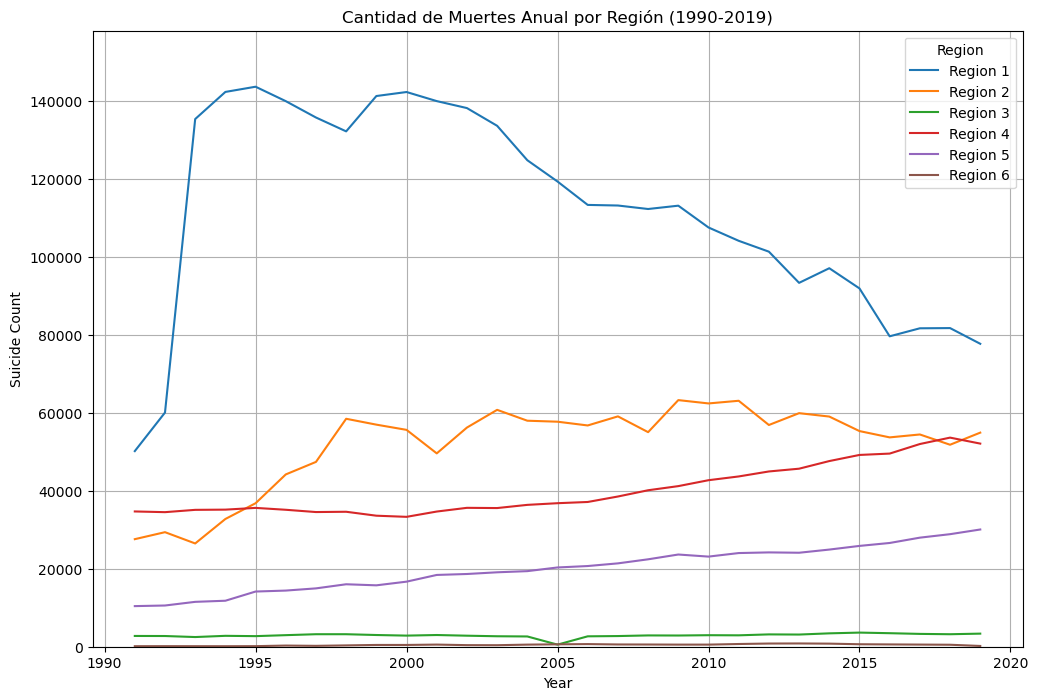

In [43]:
df_filtered = df[df['Year'] <= 2019]


suicide_count_by_year_region = df_filtered.groupby(['Year', 'RegionCode'])['SuicideCount'].sum().reset_index()

# Analysis
suicide_count_pivot_region = suicide_count_by_year_region.pivot(index='Year', columns='RegionCode', values='SuicideCount')

plt.figure(figsize=(12, 8))
for region in suicide_count_pivot_region.columns:
    plt.plot(suicide_count_pivot_region.index, suicide_count_pivot_region[region], label=f'Region {region}')

plt.title('Cantidad de Muertes Anual por Región (1990-2019)')
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.legend(title='Region')
plt.grid(True)


plt.ylim(0, suicide_count_pivot_region.max().max() * 1.1)


plt.ticklabel_format(style='plain', axis='y')

plt.show()


                 1             2            3             4             5  \
Year                                                                        
2020  91578.566502  64889.238916  3223.662562  50586.812808  29871.438424   
2021  90219.539901  65758.512315  3245.145813  51284.501478  30529.352709   
2022  88860.513300  66627.785714  3266.629064  51982.190148  31187.266995   
2023  87501.486700  67497.059113  3288.112315  52679.878818  31845.181281   
2024  86142.460099  68366.332512  3309.595567  53377.567488  32503.095567   
2025  84783.433498  69235.605911  3331.078818  54075.256158  33161.009852   
2026  83424.406897  70104.879310  3352.562069  54772.944828  33818.924138   
2027  82065.380296  70974.152709  3374.045320  55470.633498  34476.838424   
2028  80706.353695  71843.426108  3395.528571  56168.322167  35134.752709   
2029  79347.327094  72712.699507  3417.011823  56866.010837  35792.666995   
2030  77988.300493  73581.972906  3438.495074  57563.699507  36450.581281   

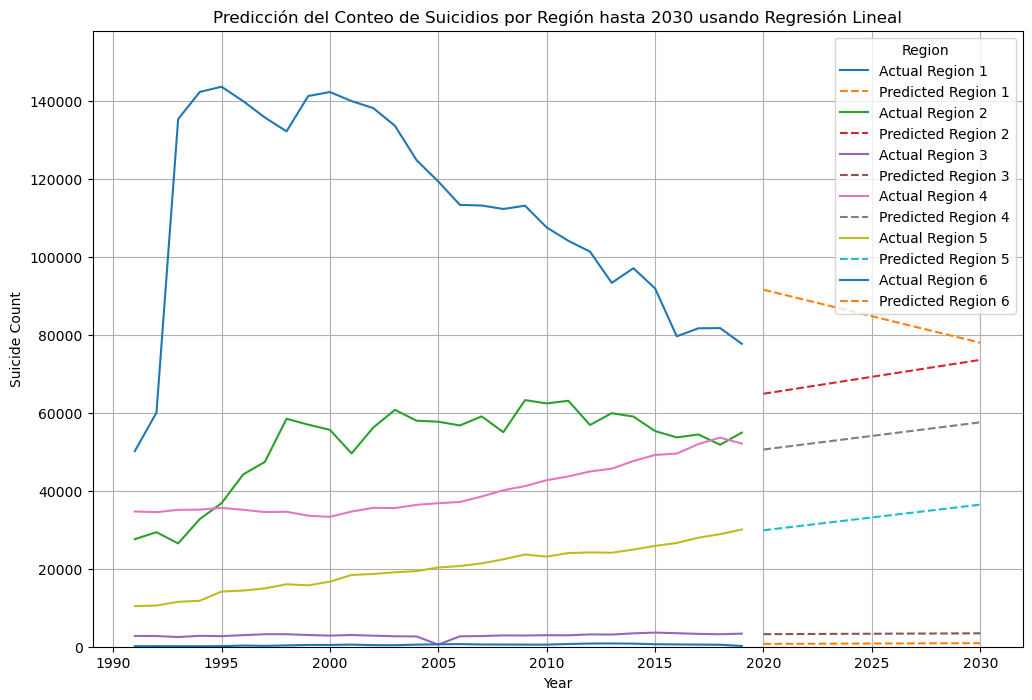

In [44]:
df_filtered = df[df['Year'] <= 2019]

suicide_count_by_year_region = df_filtered.groupby(['Year', 'RegionCode'])['SuicideCount'].sum().reset_index()

suicide_count_pivot_region = suicide_count_by_year_region.pivot(index='Year', columns='RegionCode', values='SuicideCount')

predictions = {}
for region in suicide_count_pivot_region.columns:
    X = suicide_count_pivot_region.index.values.reshape(-1, 1)
    y = suicide_count_pivot_region[region].values
    model = LinearRegression()
    model.fit(X, y)
    
    future_years = np.arange(2020, 2031).reshape(-1, 1)
    predictions[region] = model.predict(future_years)

predictions_df = pd.DataFrame(predictions, index=np.arange(2020, 2031))
predictions_df.index.name = 'Year'

print(predictions_df)

plt.figure(figsize=(12, 8))
for region in suicide_count_pivot_region.columns:
    plt.plot(suicide_count_pivot_region.index, suicide_count_pivot_region[region], label=f'Actual Region {region}')
    plt.plot(predictions_df.index, predictions_df[region], label=f'Predicted Region {region}', linestyle='--')

plt.title('Predicción del Conteo de Suicidios por Región hasta 2030 usando Regresión Lineal')
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.legend(title='Region')
plt.grid(True)


plt.ylim(0, max(suicide_count_pivot_region.max().max(), predictions_df.max().max()) * 1.1)
plt.ticklabel_format(style='plain', axis='y')

plt.show()


# Conclusion

Europe is the most impactful region of the Suicide Rates and suicide count over the year and the correlation with the socioeconomic aspects of every country is just high and this make sense if we look at the ages of the dataset.

Over the years the predictions per sex and region show than also Europe is the country with most decreced proyection.
